# Code for creating Figure 4

In [1]:
from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.io import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymodulon.compare import *
import math
import seaborn as sns
import numbers
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rcParams['font.family'] = 'sans-serif'
sns.set_style('ticks')
matplotlib.rcParams['text.color'] = '#000000'
matplotlib.rcParams['axes.labelcolor'] = '#000000'
matplotlib.rcParams['xtick.color'] = '#000000'
matplotlib.rcParams['ytick.color'] = '#000000'

In [2]:
# Load ICA object
ica_PS = load_json_model('p_syringae_2.json')

### Figure 4A
Created on BioRender (https://biorender.com/)

### Fig 4B

C:\Users\99hee\AppData\Local\Programs\Python\Python310\lib\site-packages\pymodulon\plotting.py:836: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  mod_cogs = ica_data.gene_table.loc[component_genes].COG


<AxesSubplot: xlabel='Gene Start', ylabel='Flagella-2 Gene Weight'>

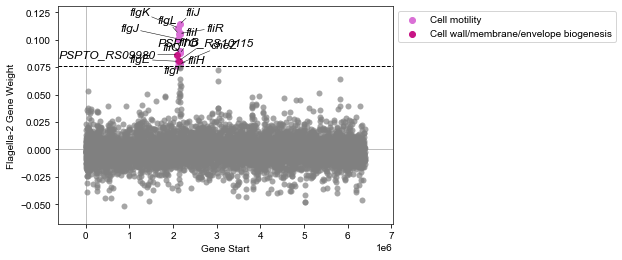

In [3]:
plot_gene_weights(ica_PS, 'Flagella-2')

### Fig 4C

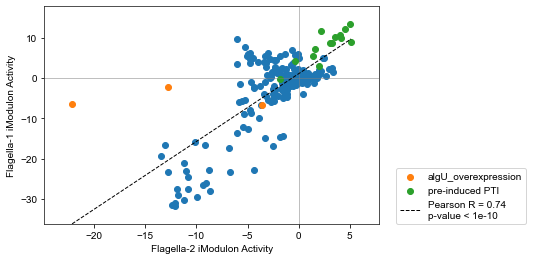

In [10]:
groups = {'SRX3158990':'pre-induced PTI',
          'SRX3158991': 'pre-induced PTI',
          'SRX3158989':'pre-induced PTI',
          'SRX3644659':'pre-induced PTI',
          'SRX3644660':'pre-induced PTI',
          'SRX3644661':'pre-induced PTI',
          'SRX3644665':'pre-induced PTI',
          'SRX3644666':'pre-induced PTI',
          'SRX3644667':'pre-induced PTI',
          'SRX3644671':'pre-induced PTI',
          'SRX3644672':'pre-induced PTI',
          'SRX3644673':'pre-induced PTI',
          'SRX3159069': 'pre-induced PTI',
          'SRX3159073':'pre-induced PTI',
          'SRX1828914':'algU_overexpression',
          'SRX1828916': 'algU_overexpression',
          'SRX1828918':'algU_overexpression'}

ax = compare_activities(ica_PS, 'Flagella-2', 'Flagella-1', groups = groups)
ax.legend(loc = (1.05,0))

### Fig 4D

<AxesSubplot: xlabel='algU_regulon:empty_vector', ylabel='algU_regulon:algU_overexpression'>

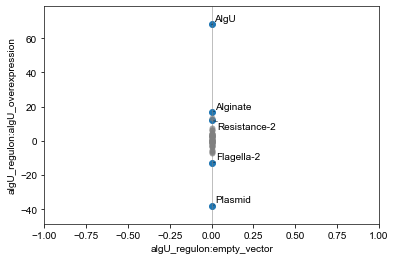

In [8]:
# DiMA plot of AlgU overexpression samples vs AlgU deletion samples
plot_dima(ica_PS, 'algU_regulon:empty_vector', 'algU_regulon:algU_overexpression', fdr = 0.15)

In [10]:
ica_PS.sample_table[ica_PS.sample_table.condition == 'algU_overexpression'].index

Index(['SRX1828914', 'SRX1828916', 'SRX1828918'], dtype='object')

In [74]:
df = ica_PS.A[['SRX1828914', 'SRX1828916', 'SRX1828918']].loc[['AlgU','Plasmid','Alginate','Resistance-2','Flagella-2']]
df['average'] = df.mean(axis = 'columns').values
df['abs_average'] = abs(df['average'])

df.sort_values('average')

,SRX1828914,SRX1828916,SRX1828918,average,abs_average
Plasmid,-38.300458,-37.839045,-37.628026,-37.922510,37.922510
Flagella-2,-3.597377,-22.169610,-12.812362,-12.859783,12.859783
Resistance-2,11.529286,11.665625,12.448912,11.881274,11.881274
Alginate,16.488119,17.510469,16.024000,16.674196,16.674196
AlgU,68.707131,67.185892,68.110321,68.001115,68.001115


meta NOT subset; don't know how to subset; dropped


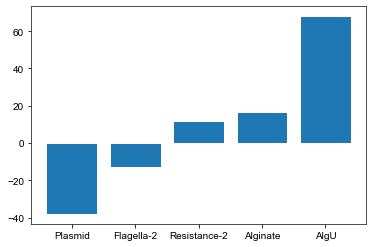

In [76]:
plt.bar(df.sort_values('average').abs_average.index.values, df.sort_values('average').average.values)